**NAME - Sai Teja**

In [ ]:
pip install wbgapi

In [1]:
import pandas as pd
import wbgapi as wb
import sklearn
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
import warnings
from sklearn.preprocessing import StandardScaler

In [24]:
#Pandas function to read the dataset from the indicators downloaded from World Indicators Repository
dset=pd.read_csv(r"C:\\Sai Teja\Applied Data Science 3\World Bank Repo.csv", low_memory=False)

In [25]:
dset.head(5)

,economy,AFG,AFG.1,AFG.2,AFG.3,AUS,AUS.1,AUS.2,AUS.3,BGR,...,IND.2,IND.3,LUX,LUX.1,LUX.2,LUX.3,PAK,PAK.1,PAK.2,PAK.3
0,series,EN.ATM.CO2E.GF.KT,EN.ATM.PM25.MC.T1.ZS,NY.GDP.MKTP.PP.CD,SL.UEM.ADVN.ZS,EN.ATM.CO2E.GF.KT,EN.ATM.PM25.MC.T1.ZS,NY.GDP.MKTP.PP.CD,SL.UEM.ADVN.ZS,EN.ATM.CO2E.GF.KT,...,NY.GDP.MKTP.PP.CD,SL.UEM.ADVN.ZS,EN.ATM.CO2E.GF.KT,EN.ATM.PM25.MC.T1.ZS,NY.GDP.MKTP.PP.CD,SL.UEM.ADVN.ZS,EN.ATM.CO2E.GF.KT,EN.ATM.PM25.MC.T1.ZS,NY.GDP.MKTP.PP.CD,SL.UEM.ADVN.ZS
1,YR1971,440.04,NaN,NaN,NaN,4103.373,NaN,NaN,NaN,568.385,...,NaN,NaN,62.339,NaN,NaN,NaN,4946.783,NaN,NaN,NaN
2,YR1972,300.694,NaN,NaN,NaN,5848.865,NaN,NaN,NaN,381.368,...,NaN,NaN,267.691,NaN,NaN,NaN,5412.492,NaN,NaN,NaN
3,YR1973,333.697,NaN,NaN,NaN,6490.59,NaN,NaN,NaN,385.035,...,NaN,NaN,502.379,NaN,NaN,NaN,6178.895,NaN,NaN,NaN
4,YR1974,399.703,NaN,NaN,NaN,7715.368,NaN,NaN,NaN,839.743,...,NaN,NaN,671.061,NaN,NaN,NaN,7011.304,NaN,NaN,NaN


In [26]:
#Setting index
dset1=dset.set_index('economy')

In [27]:
#Checking the initial rows of data
dset1.head(6)

,AFG,AFG.1,AFG.2,AFG.3,AUS,AUS.1,AUS.2,AUS.3,BGR,BGR.1,...,IND.2,IND.3,LUX,LUX.1,LUX.2,LUX.3,PAK,PAK.1,PAK.2,PAK.3
economy,,,,,,,,,,,,,,,,,,,,,
series,EN.ATM.CO2E.GF.KT,EN.ATM.PM25.MC.T1.ZS,NY.GDP.MKTP.PP.CD,SL.UEM.ADVN.ZS,EN.ATM.CO2E.GF.KT,EN.ATM.PM25.MC.T1.ZS,NY.GDP.MKTP.PP.CD,SL.UEM.ADVN.ZS,EN.ATM.CO2E.GF.KT,EN.ATM.PM25.MC.T1.ZS,...,NY.GDP.MKTP.PP.CD,SL.UEM.ADVN.ZS,EN.ATM.CO2E.GF.KT,EN.ATM.PM25.MC.T1.ZS,NY.GDP.MKTP.PP.CD,SL.UEM.ADVN.ZS,EN.ATM.CO2E.GF.KT,EN.ATM.PM25.MC.T1.ZS,NY.GDP.MKTP.PP.CD,SL.UEM.ADVN.ZS
YR1971,440.04,NaN,NaN,NaN,4103.373,NaN,NaN,NaN,568.385,NaN,...,NaN,NaN,62.339,NaN,NaN,NaN,4946.783,NaN,NaN,NaN
YR1972,300.694,NaN,NaN,NaN,5848.865,NaN,NaN,NaN,381.368,NaN,...,NaN,NaN,267.691,NaN,NaN,NaN,5412.492,NaN,NaN,NaN
YR1973,333.697,NaN,NaN,NaN,6490.59,NaN,NaN,NaN,385.035,NaN,...,NaN,NaN,502.379,NaN,NaN,NaN,6178.895,NaN,NaN,NaN
YR1974,399.703,NaN,NaN,NaN,7715.368,NaN,NaN,NaN,839.743,NaN,...,NaN,NaN,671.061,NaN,NaN,NaN,7011.304,NaN,NaN,NaN
YR1975,476.71,NaN,NaN,NaN,8375.428,NaN,NaN,NaN,2225.869,NaN,...,NaN,NaN,784.738,NaN,NaN,NaN,7605.358,NaN,NaN,NaN


In [28]:
#Checking the initial rows of data in a transpose form
dset1.T.head(6)

economy,series,YR1971,YR1972,YR1973,YR1974,YR1975,YR1976,YR1977,YR1978,YR1979,...,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020
AFG,EN.ATM.CO2E.GF.KT,440.04,300.694,333.697,399.703,476.71,300.694,513.38,300.694,385.035,...,308.028,308.028,297.027,271.358,282.359,319.029,NaN,NaN,NaN,NaN
AFG.1,EN.ATM.PM25.MC.T1.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99.9934702173874,99.9085935266891,99.8562187902678,99.7213348087994,99.8345704823674,99.6378371534564,99.6629497098259,NaN,NaN,NaN
AFG.2,NY.GDP.MKTP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,51184181904.4289,59667003515.1962,65039839448.5561,69058343420.1602,71831696727.8086,70097956089.2877,74711922906.3738,77415569869.8162,81879802965.493,80918342084.7864
AFG.3,SL.UEM.ADVN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,7.8600001335144,NaN,NaN,15.460000038147,NaN,NaN,14.3800001144409
AUS,EN.ATM.CO2E.GF.KT,4103.373,5848.865,6490.59,7715.368,8375.428,9266.509,11059.672,13813.589,15298.724,...,68525.229,65430.281,69313.634,72606.6,73809.376,79122.859,NaN,NaN,NaN,NaN
AUS.1,EN.ATM.PM25.MC.T1.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [2]:
indi_GD = ['SL.UEM.ADVN.ZS','NY.GDP.MKTP.PP.CD']
conty_cde = ["AFG","IND",'AUS','PAK','BGR','GBR','ESP','LUX','CHL','CHE']
indi_CL=['EN.ATM.PM25.MC.T1.ZS','EN.ATM.CO2E.GF.KT']
G  = wb.data.DataFrame(indi_GD, conty_cde, mrv=7)
C = wb.data.DataFrame(indi_CL, conty_cde, mrv=7)
#SL.UEM.ADVN.ZS: Unemployment with advanced education (% of total labor force with advanced education)	
#NY.GDP.MKTP.PP.CD: PPP, GDP of a country
#EN.ATM.PM25.MC.T1.ZS: PM2.5 pollution exceeding WHO target levels
#EN.ATM.CO2E.GF.KT: CO2 emissions from fuel consumptions of gas 


In [3]:
# Economy indicators
G.columns = [s.replace('YR','') for s in G.columns]      
G=G.stack().unstack(level=1)                             
G.index.names = ['Cnt_Cde', 'Year']                           
G.columns                                                     
G.fillna(0)
G.head(10)

series        NY.GDP.MKTP.PP.CD  SL.UEM.ADVN.ZS
Cnt_Cde Year                                   
AFG     2014       6.905834e+10            7.86
        2015       7.183170e+10             NaN
        2016       7.009796e+10             NaN
        2017       7.471192e+10           15.46
        2018       7.741557e+10             NaN
        2019       8.187980e+10             NaN
        2020       8.091834e+10           14.38
AUS     2014       1.100561e+12            3.73
        2015       1.101457e+12            3.55
        2016       1.143149e+12            3.46

In [4]:
# Cllimate indicators
C.columns = [s.replace('YR','') for s in C.columns]      
C=C.stack().unstack(level=1)                             
C.index.names = ['Cnt_Cde', 'Year']                           
C.columns                                                     
C.fillna(0)
C.head(10)

series        EN.ATM.CO2E.GF.KT  EN.ATM.PM25.MC.T1.ZS
Cnt_Cde Year                                         
AFG     2011            308.028             99.993470
        2012            308.028             99.908594
        2013            297.027             99.856219
        2014            271.358             99.721335
        2015            282.359             99.834570
        2016            319.029             99.637837
        2017                NaN             99.662950
AUS     2011          68525.229              0.000000
        2012          65430.281              0.000000
        2013          69313.634              0.000000

In [5]:
#Dataset prep
dp1=G.reset_index()
dp2=C.reset_index()
dp3=dp1.fillna(0)
dp4=dp2.fillna(0)

In [6]:
#Merging the values
dpfinal = pd.merge(dp3, dp4)
dpfinal.head(14)

series,Cnt_Cde,Year,NY.GDP.MKTP.PP.CD,SL.UEM.ADVN.ZS,EN.ATM.CO2E.GF.KT,EN.ATM.PM25.MC.T1.ZS
0,AFG,2014,6.905834e+10,7.86,271.358,99.721335
1,AFG,2015,7.183170e+10,0.00,282.359,99.834570
2,AFG,2016,7.009796e+10,0.00,319.029,99.637837
3,AFG,2017,7.471192e+10,15.46,0.000,99.662950
4,AUS,2014,1.100561e+12,3.73,72606.600,0.000000
5,AUS,2015,1.101457e+12,3.55,73809.376,0.000000
6,AUS,2016,1.143149e+12,3.46,79122.859,0.000000
7,AUS,2017,1.190694e+12,3.31,0.000,0.000000
8,BGR,2014,1.272635e+11,5.10,5412.492,0.109959
9,BGR,2015,1.320171e+11,3.95,5944.207,0.109980


In [7]:
#Value normalization 
dpfinal1 = dpfinal.iloc[:,2:]
dpfinal.iloc[:,2:] = (dpfinal1-dpfinal1.min())/ (dpfinal1.max() - dpfinal1.min())
dpfinal.head(6)

series,Cnt_Cde,Year,NY.GDP.MKTP.PP.CD,SL.UEM.ADVN.ZS,EN.ATM.CO2E.GF.KT,EN.ATM.PM25.MC.T1.ZS
0,AFG,2014,0.001275,0.468136,0.001707,0.998866
1,AFG,2015,0.001613,0.000000,0.001776,1.000000
2,AFG,2016,0.001402,0.000000,0.002007,0.998029
3,AFG,2017,0.001963,0.920786,0.000000,0.998281
4,AUS,2014,0.126787,0.222156,0.456758,0.000000
5,AUS,2015,0.126896,0.211435,0.464324,0.000000


In [8]:
#Clustering the full dataset with K-means
dp_value = dpfinal.drop('Cnt_Cde', axis = 1)
kmns = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(dp_value)

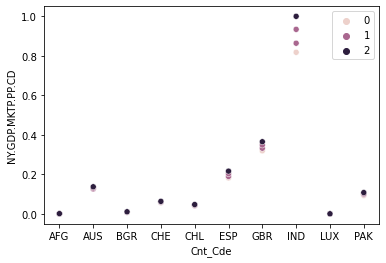

In [9]:
#Clustering based on GDP PPP
sns.scatterplot(data=dpfinal, x="Cnt_Cde", y="NY.GDP.MKTP.PP.CD", hue=kmns.labels_)
plt.legend(loc='best')
plt.show()

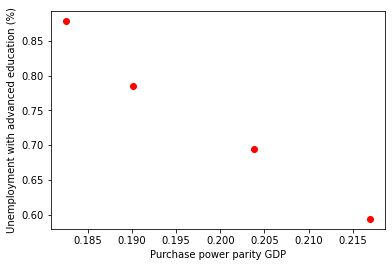

In [10]:
#Scatter plot using pyplot to understand the relation between Unemployment with advanced education (%) and Purchase power parity GDP
ct=dpfinal[(dpfinal['Cnt_Cde']=='ESP')]
dat = ct.values
x, y = dat[:, 2], dat[:, 3]

plt.scatter(x, y,color="red")

plt.ylabel('Unemployment with advanced education (%)')
plt.xlabel('Purchase power parity GDP')
plt.show()

Covariance value is:  [[ 5154.98116235 -2060.39990878   204.97250741]
 [-2060.39990878   823.98254608   -82.01673938]
 [  204.97250741   -82.01673938     8.16826314]]
Params value is:  [ 59.57530596 -31.77329419   4.68615733]


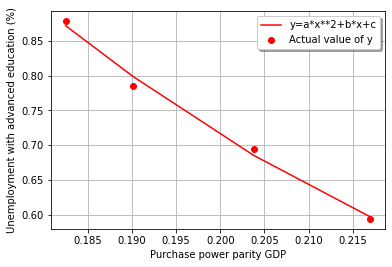

In [11]:
#Using curve_fit function and pyplot for Spain which has a medium purchase power parity GDP
#This is an inter-country comparison for understanding the relationship between
# unemployment with advanced education % and purchase power parity GDP for Spain
x, y = dat[:, 2], dat[:, 3]

def f(x, a, b, c):
    return a*x**2+b*x+c
parm, covr = curve_fit(f, x, y)
print("Covariance value is: ", covr)
print("Params value is: ", parm)
parm, _ = curve_fit(f, x, y)
a, b, c = parm[0], parm[1], parm[2]
yfit = a*x**2+b*x+c

with warnings.catch_warnings(record=True):
    plt.plot(x, yfit, label="y=a*x**2+b*x+c",color="red")
    plt.grid(True)
    plt.plot(x, y, 'bo', label="Actual value of y",color="red")
    plt.ylabel('Unemployment with advanced education (%)')
    plt.xlabel('Purchase power parity GDP')

    plt.legend(loc='best', fancybox=True, shadow=True)

    plt.show() 

**For Spain which has a mid-level purchase power parity GDP, the relationship between unemployment for advanced education % vs purchase power parity GDP is indirect which means that with increase in purchase power parity GDP there would be a decrease in the unemployment for advanced education %**

Covariance value is:  [[-0.  0. -0.]
 [ 0. -0.  0.]
 [-0.  0. -0.]]
Params value is:  [ 9.28294957e-316 -1.68847795e-315  7.63352776e-316]


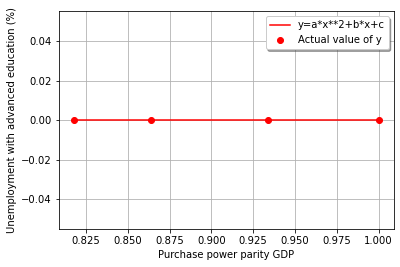

In [12]:
#Using curve_fit function and pyplot for India which has a high purchase power parity GDP
#This is an inter-country comparison for understanding the relationship between
# unemployment with advanced education % and purchase power parity GDP for India
ct3=dpfinal[(dpfinal['Cnt_Cde']=='IND')]
dat3 = ct3.values

x, y = dat3[:, 2], dat3[:, 3]

def f(x, a, b, c):
    return a*x**2+b*x+c
parm, covr = curve_fit(f, x, y)
print("Covariance value is: ", covr)
print("Params value is: ", parm)
parm, _ = curve_fit(f, x, y)
a, b, c = parm[0], parm[1], parm[2]
yfit = a*x**2+b*x+c

with warnings.catch_warnings(record=True):
    plt.plot(x, yfit, label="y=a*x**2+b*x+c",color="red")
    plt.grid(True)
    plt.plot(x, y, 'bo', label="Actual value of y",color="red")
    plt.ylabel('Unemployment with advanced education (%)')
    plt.xlabel('Purchase power parity GDP')

    plt.legend(loc='best', fancybox=True, shadow=True)

    plt.show() 

**For India which has a high purchase power parity GDP, the relationship between unemployment for advanced education % vs purchase power parity GDP is a straight line parallel to X-axis which means that with increase in the purchase power parity GDP of both these countries there is no increase in the unemployment % for advanced education**

Covariance value is:  [[-0.  0. -0.]
 [ 0. -0.  0.]
 [-0.  0. -0.]]
Params value is:  [ 9.28294957e-316 -1.68847795e-315  7.63352776e-316]


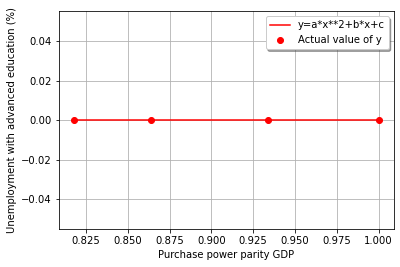

In [13]:
#Using the curve_fit function and pyplot for Afghanistan which has a low purchase power parity GDP
#This is an inter-country comparison for understanding the relationship between
# unemployment with advanced education % and purchase power parity GDP for Afghanistan
ct5=dpfinal[(dpfinal['Cnt_Cde']=='AFG')]
dat5 = ct3.values

x, y = dat5[:, 2], dat5[:, 3]

def f(x, a, b, c):
    return a*x**2+b*x+c
parm, covr = curve_fit(f, x, y)
print("Covariance value is: ", covr)
print("Params value is: ", parm)
parm, _ = curve_fit(f, x, y)
a, b, c = parm[0], parm[1], parm[2]
yfit = a*x**2+b*x+c

with warnings.catch_warnings(record=True):
    plt.plot(x, yfit, label="y=a*x**2+b*x+c",color="red")
    plt.grid(True)
    plt.plot(x, y, 'bo', label="Actual value of y",color="red")
    plt.ylabel('Unemployment with advanced education (%)')
    plt.xlabel('Purchase power parity GDP')

    plt.legend(loc='best', fancybox=True, shadow=True)

    plt.show() 

**For Afghanistan which has a low purchase power parity GDP, the relationship between unemployment for advanced education % vs purchase power parity GDP is a straight line parallel to X-axis which means that with increase in the purchase power parity GDP of both these countries there is no increase in the unemployment % for advanced education**

In [12]:
def err_ranges(x, func, param, sigma):
    import itertools as iter
    # initiate arrays for lower and upper limits
    lower = func(x, *param)
    upper = lower
    
    uplow = []   # list to hold upper and lower limits for parameters
    for p,s in zip(param, sigma):
        pmin = p - s
        pmax = p + s
        uplow.append((pmin, pmax))
        
    pmix = list(iter.product(*uplow))
    
    for p in pmix:
        y = func(x, *p)
        lower = np.minimum(lower, y)
        upper = np.maximum(upper, y)
        
    return lower, upper 

**CONCLUSION**

**1. The clustering analysis shows that the countries considered has been segregated based on the purchase power parity GDP. The categorizations are High, Medium and Low. We observed that India had a high purchase power parity GDP. The countries such as Great Britain, Spain, and Australia are in the mid-level based on the purchase power parity GDP. The countries such as Afghanistan, Luxembourg and Bulgaria have low purchase power parity GDP**

**2.We have visualised three line graphs for countries with High, low and medium Purchase power parity GDP. We saw that for the country with high and low Purchase power parity GDP, the relationship between unemployment with advanced education (%) and Purchase power parity GDP is parallel to x-axis which means that that with increase in purchase power parity GDP there is no increase in unemployment with advanced education (%). The country with medium Purchase power parity GDP has an indirect relationship between unemployment with advanced education (%) and Purchase power parity GDP**